# Inferencia Sugeno - Gradiente Descendente
Utilizando o metodo do gradiente descendente para aproximar a saída para f(x)=x^2

## Autores
Renan Mateus Bernado do Nascimento
<br>Nicolas Arruda Maduro

In [89]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [90]:
class IpsilonFunc:
    
    def __init__(self, p, q):
        self.p = p
        self.q = q
        
    def out(self, x):
        return self.p*x + self.q

In [97]:
import random

class GradientDescent:
    
    def __init__(self, func, func_qty, domain, input_size, learning_rate, yRange, iteration):
        self.func = func
        self.func_qty = func_qty
        self.domain = domain
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.y1 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.y2 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.input = []
        self.output = []
        self.predOutput = []
        self.iteration = iteration
        self.error_iteration = []
    
    def squareFunc(self, x):
        return x**2
    
    def pertinenceFunc1(self, x):
        return -0.25*x+0.5
    
    def pertinenceFunc2(self, x):
        return 0.25*x+0.5
    
    ''' Initiates input randomly '''
    def initInput(self):
        self.input = [ random.uniform(dominio[0], dominio[1]) for i in range(0, self.input_size) ]
            
    
    ''' Calculates output '''
    def calcOutput(self):
        for x in self.input:
            self.output = [ squareFunc(x) for x in self.input ]
        
        
    ''' Calculates predicted output '''
    def calcPredictedOutput(self, x):
        num = self.y1.out(x)*pertinenceFunc1(x) + self.y2.out(x)*pertinenceFunc2(x)
        den = pertinenceFunc1(x)+pertinenceFunc2(x)
        return num/den
    
    
    def calcError(self, y, yPred):
        return 0.5*pow((y - yPred), 2)
    
    
    ''' Partial derivative Error -> p '''
    def pDErrorP(self, y, yPred, w, w1, w2, x):
        return (y - yPred)*(w/(w1+w2)*x)
    
    
    ''' Partial derivative Error -> q '''
    def pDErrorQ(self, y, yPred, w, w1, w2):
        return (y - yPred)*(w/(w1+w2))
    
    ''' Updates an y '''
    def update(self, pDErrorP, pDErrorQ):
        self.y1.p = self.y1.p - self.learning_rate*sum(pDErrorP)
        self.y2.p = self.y2.p - self.learning_rate*sum(pDErrorP)
        self.y1.q = self.y1.q - self.learning_rate*sum(pDErrorQ)
        self.y2.q = self.y2.q - self.learning_rate*sum(pDErrorQ)
        
    
    def plotGraph(self, iteration, error):
        plt.plot(iteration, error, label='Error')
        plt.ylabel('Error')
        plt.xlabel('Iteration')
        plt.title('Error x Iteration')
        plt.legend()
        plt.show()
    
    def run(self):
        self.initInput()
        self.calcOutput()
        time = []
        
        for i in range(0, iteration):
            time.append(i)
            error = []
            pDErrorP_y1 = []
            pDErrorP_y2 = []
            pDErrorQ_y1 = []
            pDErrorQ_y2 = []
            
            for i in range(0, self.input_size):
                yPred = self.calcPredictedOutput(self.input[i])
                error.append(self.calcError(self.output[i], yPred))
                pDErrorP_y1.append(self.pDErrorP(self.output[i], yPred, pertinenceFunc1(self.input[i]), pertinenceFunc1(self.input[i]), pertinenceFunc2(self.input[i]), self.input[i]))
                pDErrorP_y2.append(self.pDErrorP(self.output[i], yPred, pertinenceFunc2(self.input[i]), pertinenceFunc1(self.input[i]), pertinenceFunc2(self.input[i]), self.input[i]))
                pDErrorQ_y1.append(self.pDErrorQ(self.output[i], yPred, pertinenceFunc1(self.input[i]), pertinenceFunc1(self.input[i]), pertinenceFunc2(self.input[i])))
                pDErrorP_y2.append(self.pDErrorQ(self.output[i], yPred, pertinenceFunc2(self.input[i]), pertinenceFunc1(self.input[i]), pertinenceFunc2(self.input[i])))
                
            self.update(pDErrorP_y1, pDErrorQ_y1)
            self.update(pDErrorP_y2, pDErrorQ_y2)
            self.error_iteration.append(sum(error))
            
        
        self.plotGraph(time, self.error_iteration)
        
                
            
        
        
        
    
    

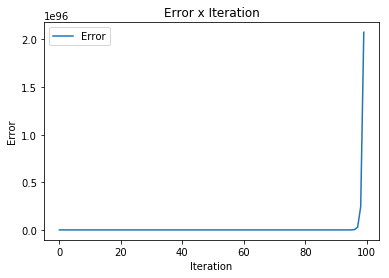

In [98]:
func = 'line'
func_qty = 2
domain = (-2, 2)
input_size = 10
learning_rate = 0.1
yRange = (-100, 100)
iteration = 100

gd = GradientDescent(func, func_qty, domain, input_size, learning_rate, yRange, iteration)
gd.run()